# Beacon

In [1]:
%load_ext autoreload
%autoreload 2
# %autoreload? for help
import cv2
import numpy as np
import math
#import picamera
import io
from IPython.display import Image
import time
import glob
from termcolor import colored
import math
import re
import cv2
import numpy as np
from matplotlib import pyplot as plt
from fct import * 

In [9]:
boundaries = [
     ([0, 37, 51], [255, 255, 60], 'y', (0,255,255)),
     ([255, 0, 0], [255, 0, 255], 'b', (255,0,0))
]

In [59]:
findCenter(380,520,200,260,boundaries,(499, 236))

NameError: name 'boundaries' is not defined

# HSV Filtering

In [4]:
findThreshold()

TypeError: function takes exactly 5 arguments (4 given)

# Find angles

time:  0.015623331069946289
[68.02549200852803, 45.00000000000001, 171.8057366653698, 122.50108054036129]


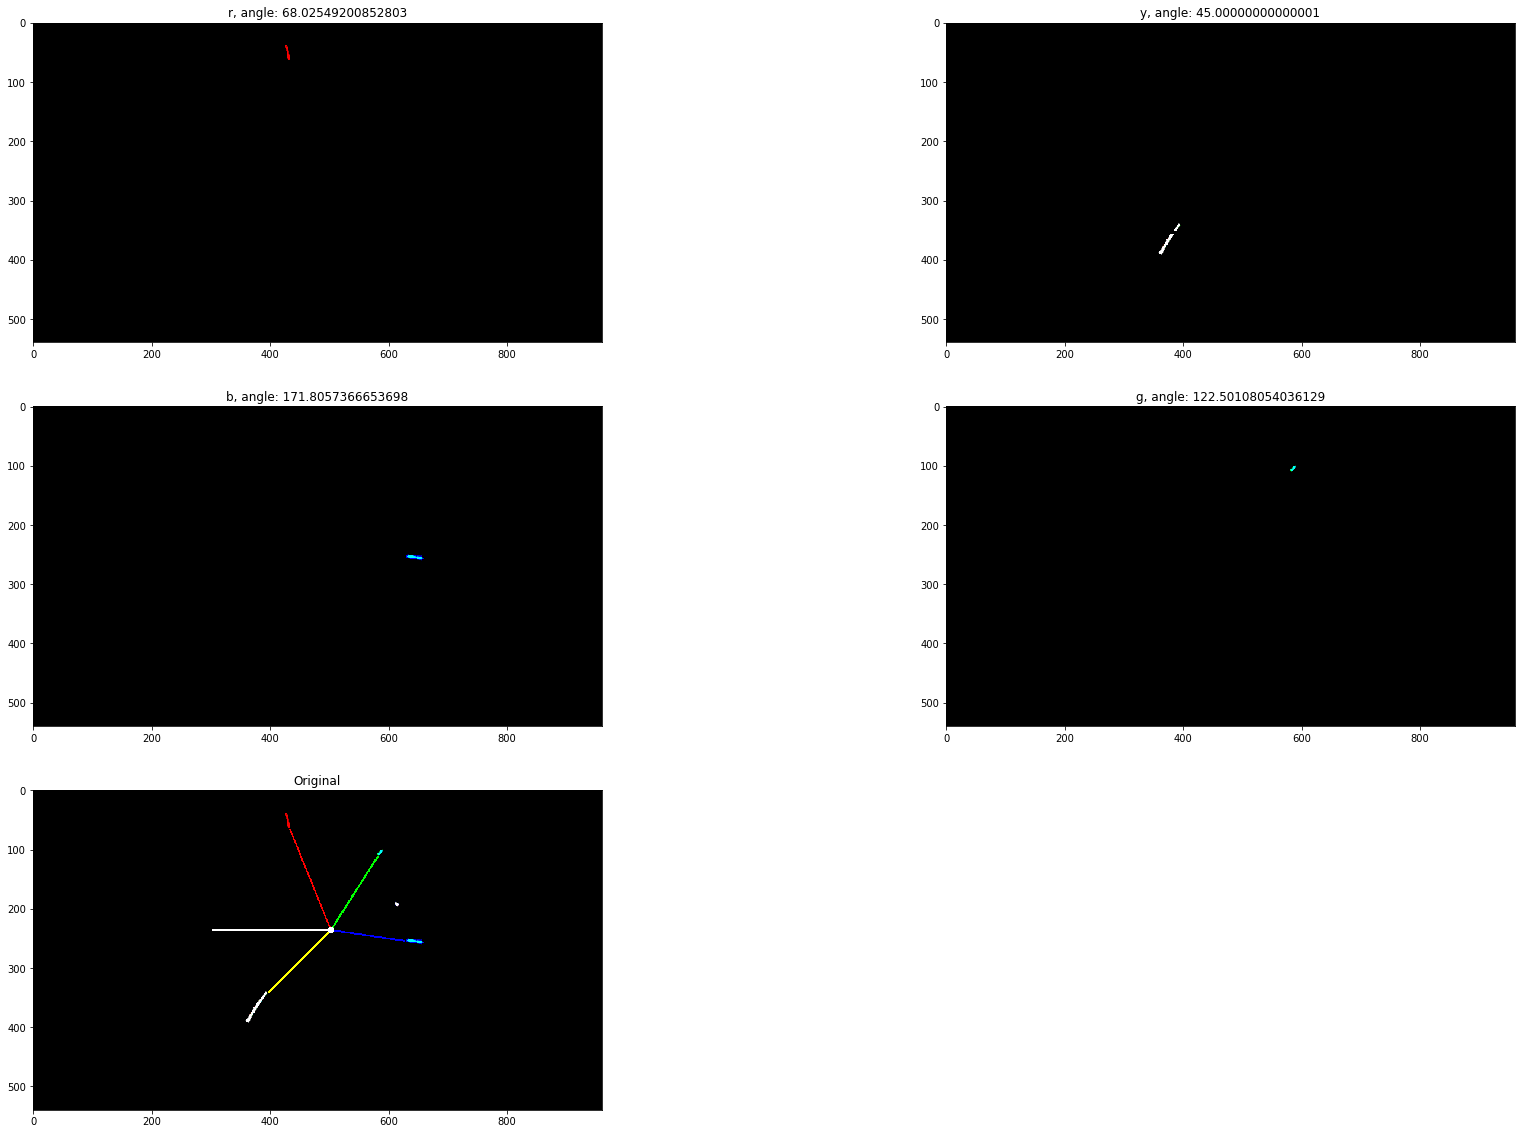

[68.02549200852803, 45.00000000000001, 171.8057366653698, 122.50108054036129]

In [32]:
threshImg = cv2.imread('threshold_img.png') 
center = (502, 236)

find_angles_with_display(threshImg,center)

# Find position

In [16]:
angles = -69,45,171
lights_coordinates = (0,8000),(0,0),(8000,0)
find_robot_pos(angles,lights_coordinates)

(1843.2012975397433, 1542.8796828305408, -185.06847094360256)

In [24]:
(90 + 278)%360

8

In [21]:
-278%360

82

In [25]:
center_circles = (940, 632)
center_beacon = (502, 236)
i = 0
images_ = []
for filename in glob.glob("./*.png"):
    i = i + 1
    print("-- Picture: ", i, '--')
    elements = re.findall('[+-]?\d+', filename)
    print(elements)
    x,y,a = elements[0],elements[1],elements[2]
    x,y,a = float(x),float(y),float(a)
    rawImage = cv2.imread(filename)    
    height,width,depth = rawImage.shape
    imgWithCircle  = np.zeros((height,width), np.uint8)
    cv2.circle(imgWithCircle,center_circles,400,(255,255,255),thickness=-1)
    cv2.circle(imgWithCircle,center_circles,80,(0,0,0),thickness=-1)
    imask = imgWithCircle>0
    img1 = np.zeros_like(rawImage, np.uint8)
    img1[imask] = rawImage[imask]

    imgWithCircle  = np.ones((height,width), np.uint8)
    cv2.circle(imgWithCircle,center_circles,320,(0,0,0),thickness=-1)
    cv2.circle(imgWithCircle,center_circles,150,(255,255,255),thickness=-1)
    imask = imgWithCircle>0
    img = np.zeros_like(img1, np.uint8)
    img[imask] = img1[imask]

    ret,thresh_img = cv2.threshold(img,220,0,cv2.THRESH_TOZERO)
    
    thresh_img,angles = find_angles_and_get_result(thresh_img,center_beacon)
    
    thresh_img[np.where((thresh_img==[0,0,0]).all(axis=2))] = [160,160,160]
    images_.append(thresh_img)
    
    if len(angles) == 3:
        a1,a2,a3 = angles
        angles = a1,a2,a3
    elif len(angles) == 4:
        a1,a2,a3,_ = angles
        angles = a1,a2,a3
    else:
        print("less than 3 lights found")
        continue

    lights_coordinates = (0,8000),(0,0),(8000,0)
    xb,yb,ab = find_robot_pos(angles,lights_coordinates)    
    print("position from beacon: ",xb,yb,ab)
    print("real position: ",x,y,a)
    dist = math.sqrt((x-xb)*(x-xb) + (y-yb)*(y-yb))
    angle_error = (a - ab)%360
    if dist > 300 or abs(a-ab) > 5:    
        print(colored("Error distance: {}, error angle: {}".format(dist,angle_error), 'red'))
        print(colored('ERROR', 'red'))
    else:
        print(colored("Error distance: {}, error angle: {}".format(dist,angle_error), 'green'))
        print(colored('GOOD', 'green'))


-- Picture:  1 --
['1000', '1000', '180']
position from beacon:  1856.0059949572887 1546.080133480308 -185.93043174897474
real position:  1000.0 1000.0 180.0
Error distance: 1015.3569695356845, error angle: 5.9304317489747405
ERROR
-- Picture:  2 --
['1000', '200', '90']
g not found
position from beacon:  -647.2831739552346 135.44550956280713 -103.0376190000563
real position:  1000.0 200.0 90.0
Error distance: 1648.5475842181922, error angle: 193.03761900005628
ERROR
-- Picture:  3 --
['1000', '4000', '0']
position from beacon:  155.29478422740834 3473.699120876252 -2.5597539644848197
real position:  1000.0 4000.0 0.0
Error distance: 995.2484699409744, error angle: 2.5597539644848197
ERROR
-- Picture:  4 --
['2000', '2000', '270']
g not found
position from beacon:  2177.867303870429 2936.578476640751 -90.95434857026665
real position:  2000.0 2000.0 270.0
Error distance: 953.3184256547469, error angle: 0.9543485702666317
ERROR
-- Picture:  5 --
['2000', '6500', '90']
g not found
positio

IndexError: list index out of range

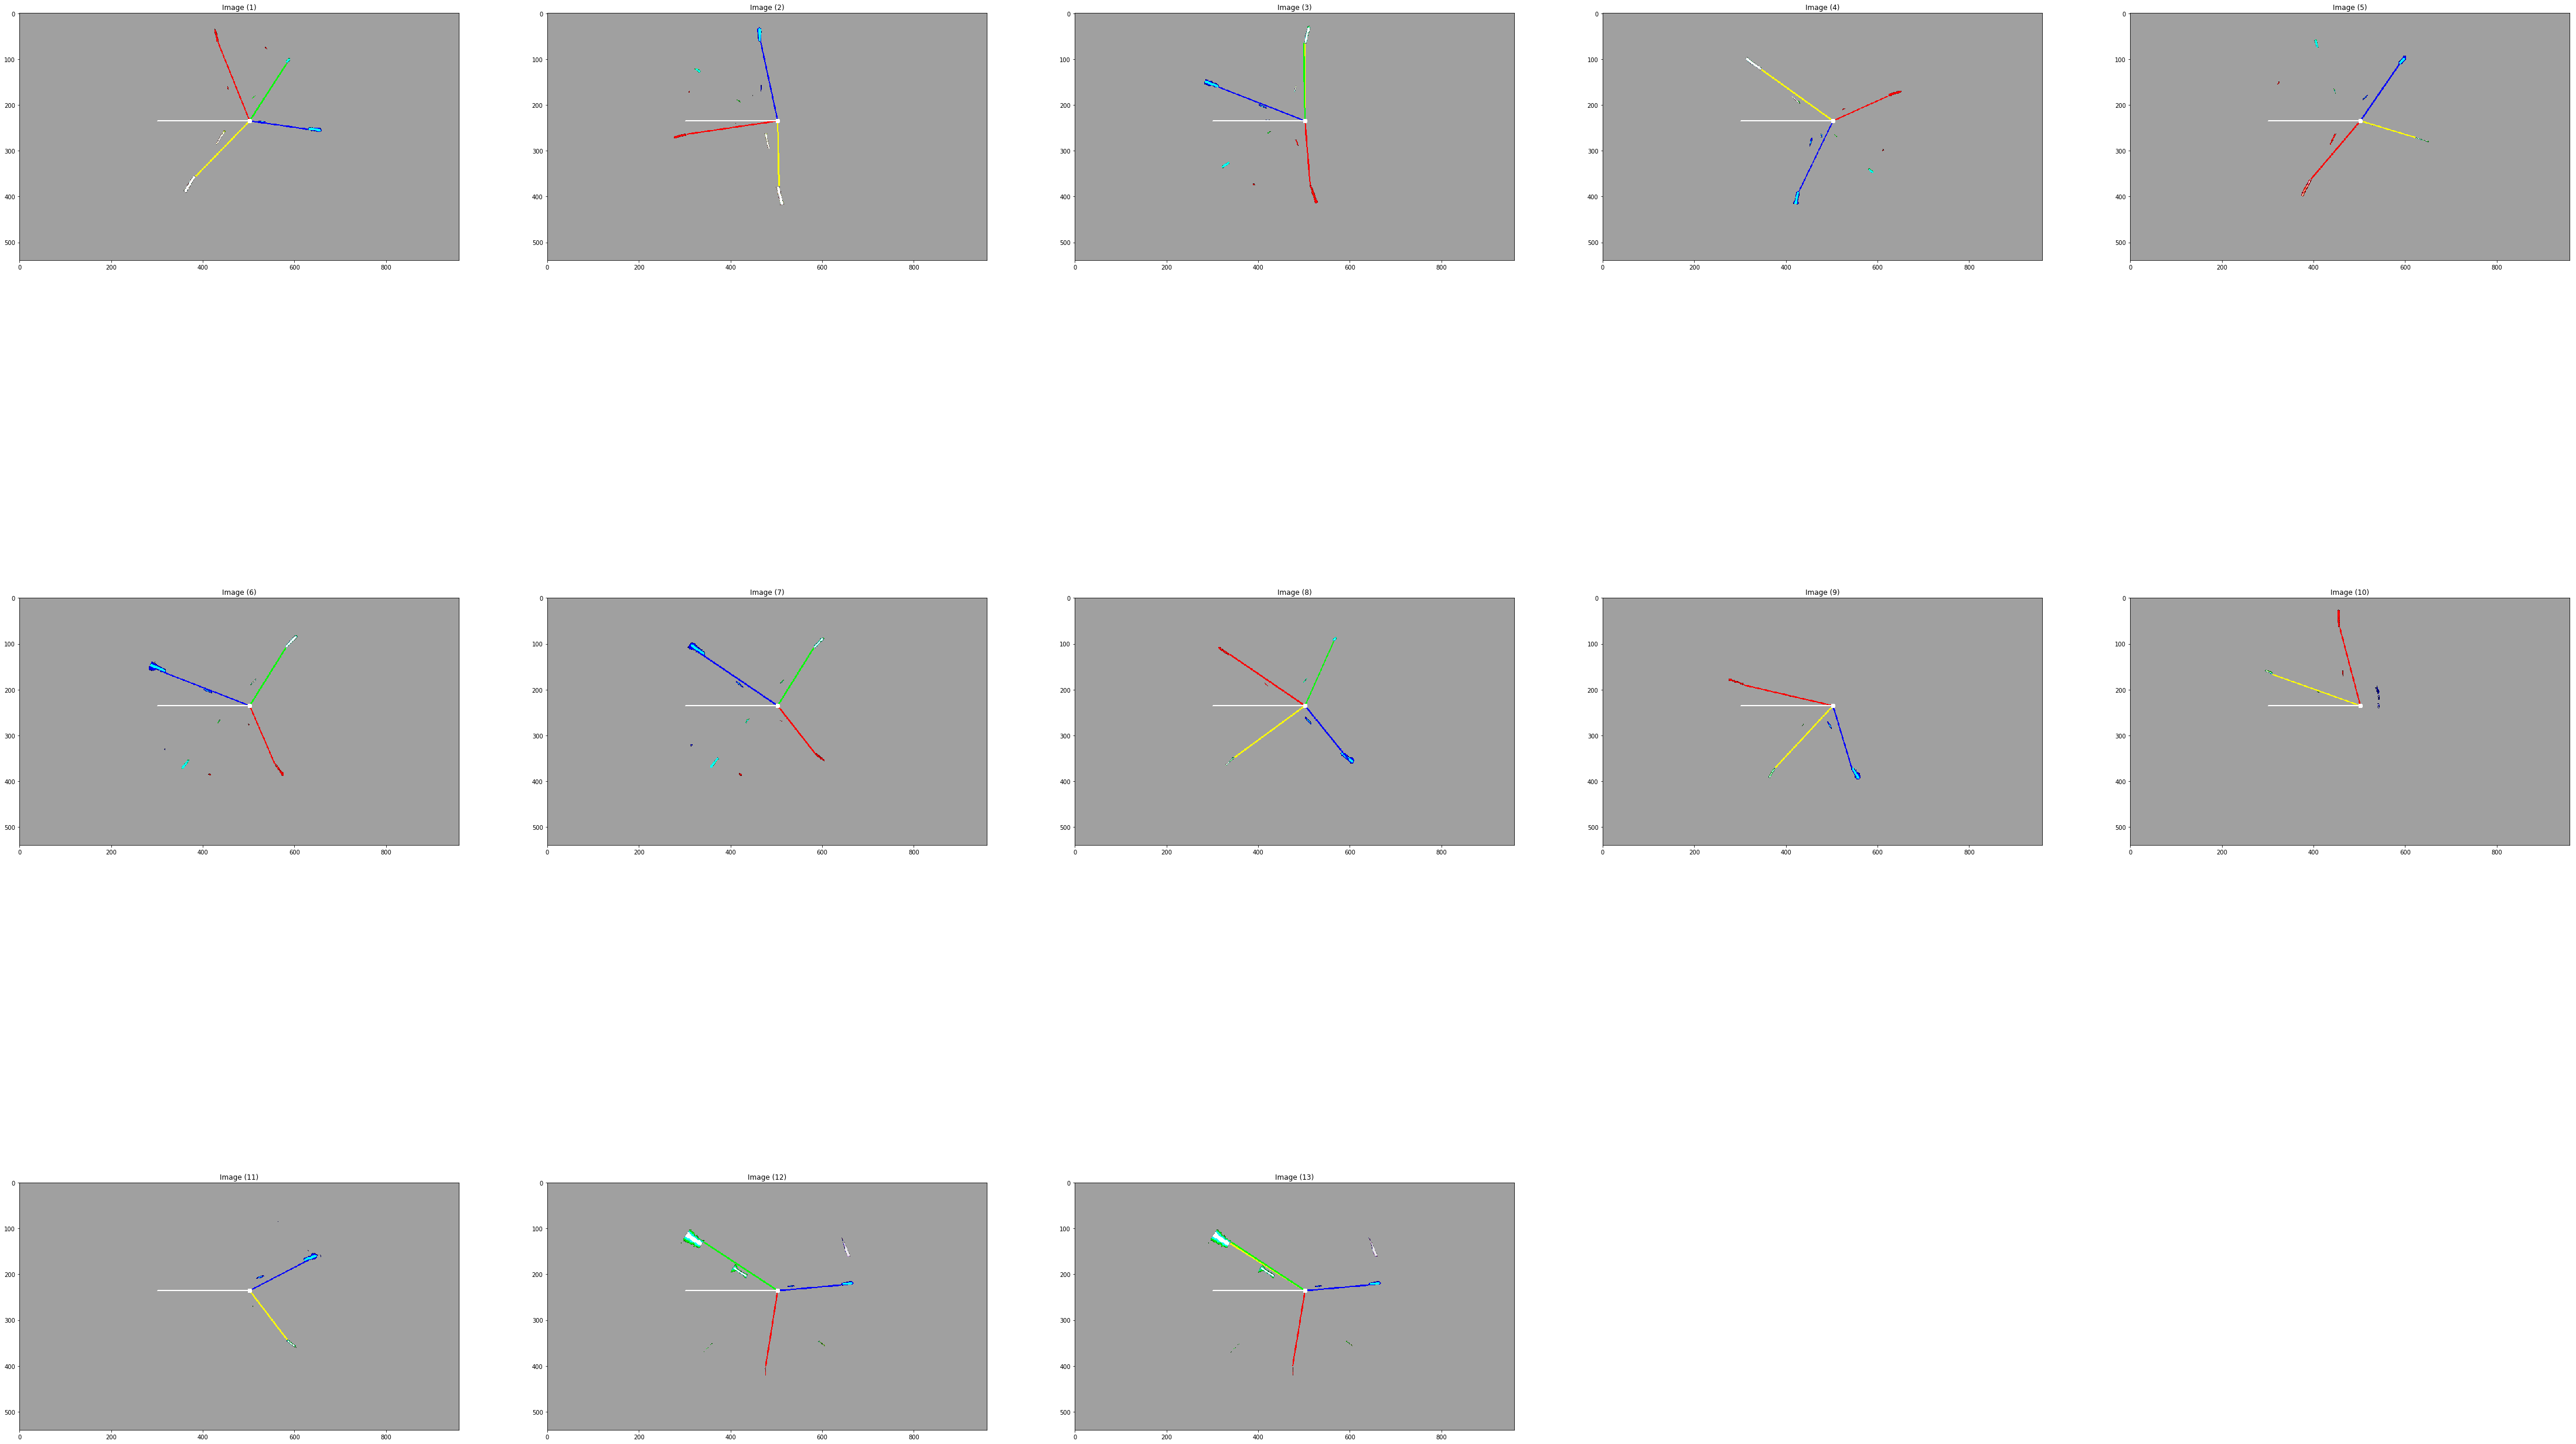

In [18]:
show_images(images_, cols = 3, titles = None)

# Create image with all lights

In [10]:
center = (940, 632)
rawImage = cv2.imread('beacon_1000_1000_180.png')    
height,width,depth = rawImage.shape
imgWithCircle  = np.zeros((height,width), np.uint8)
cv2.circle(imgWithCircle,center,400,(255,255,255),thickness=-1)
cv2.circle(imgWithCircle,center,80,(0,0,0),thickness=-1)
imask = imgWithCircle>0
img1 = np.zeros_like(rawImage, np.uint8)
img1[imask] = rawImage[imask]

imgWithCircle  = np.ones((height,width), np.uint8)
cv2.circle(imgWithCircle,center,320,(0,0,0),thickness=-1)
cv2.circle(imgWithCircle,center,150,(255,255,255),thickness=-1)
imask = imgWithCircle>0
img = np.zeros_like(img1, np.uint8)
img[imask] = img1[imask]

ret,thresh_img = cv2.threshold(img,220,0,cv2.THRESH_TOZERO)
#thresh_img = cv2.cvtColor(thresh_img, cv2.COLOR_BGR2RGB)
cv2.imwrite('threshold_img.png',thresh_img)

True

# Create image with only far lights

In [3]:
center = (940, 632)
rawImage = cv2.imread('beacon_1000_1000_180.png')    
height,width,depth = rawImage.shape
imgWithCircle  = np.zeros((height,width), np.uint8)
cv2.circle(imgWithCircle,center,400,(255,255,255),thickness=-1)
cv2.circle(imgWithCircle,center,280,(0,0,0),thickness=-1)
imask = imgWithCircle>0
img = np.zeros_like(rawImage, np.uint8)
img[imask] = rawImage[imask]
ret,thresh_img = cv2.threshold(img,232,0,cv2.THRESH_TOZERO)
#thresh_img = cv2.cvtColor(thresh_img, cv2.COLOR_BGR2RGB)
cv2.imwrite('threshold_img.png',thresh_img)

True

# Verifying images thresholding

1
2
g not found
3
4
g not found
5
g not found
6
7
8
9
g not found
10
b not found
g not found
11
r not found
g not found
12
13
14
15


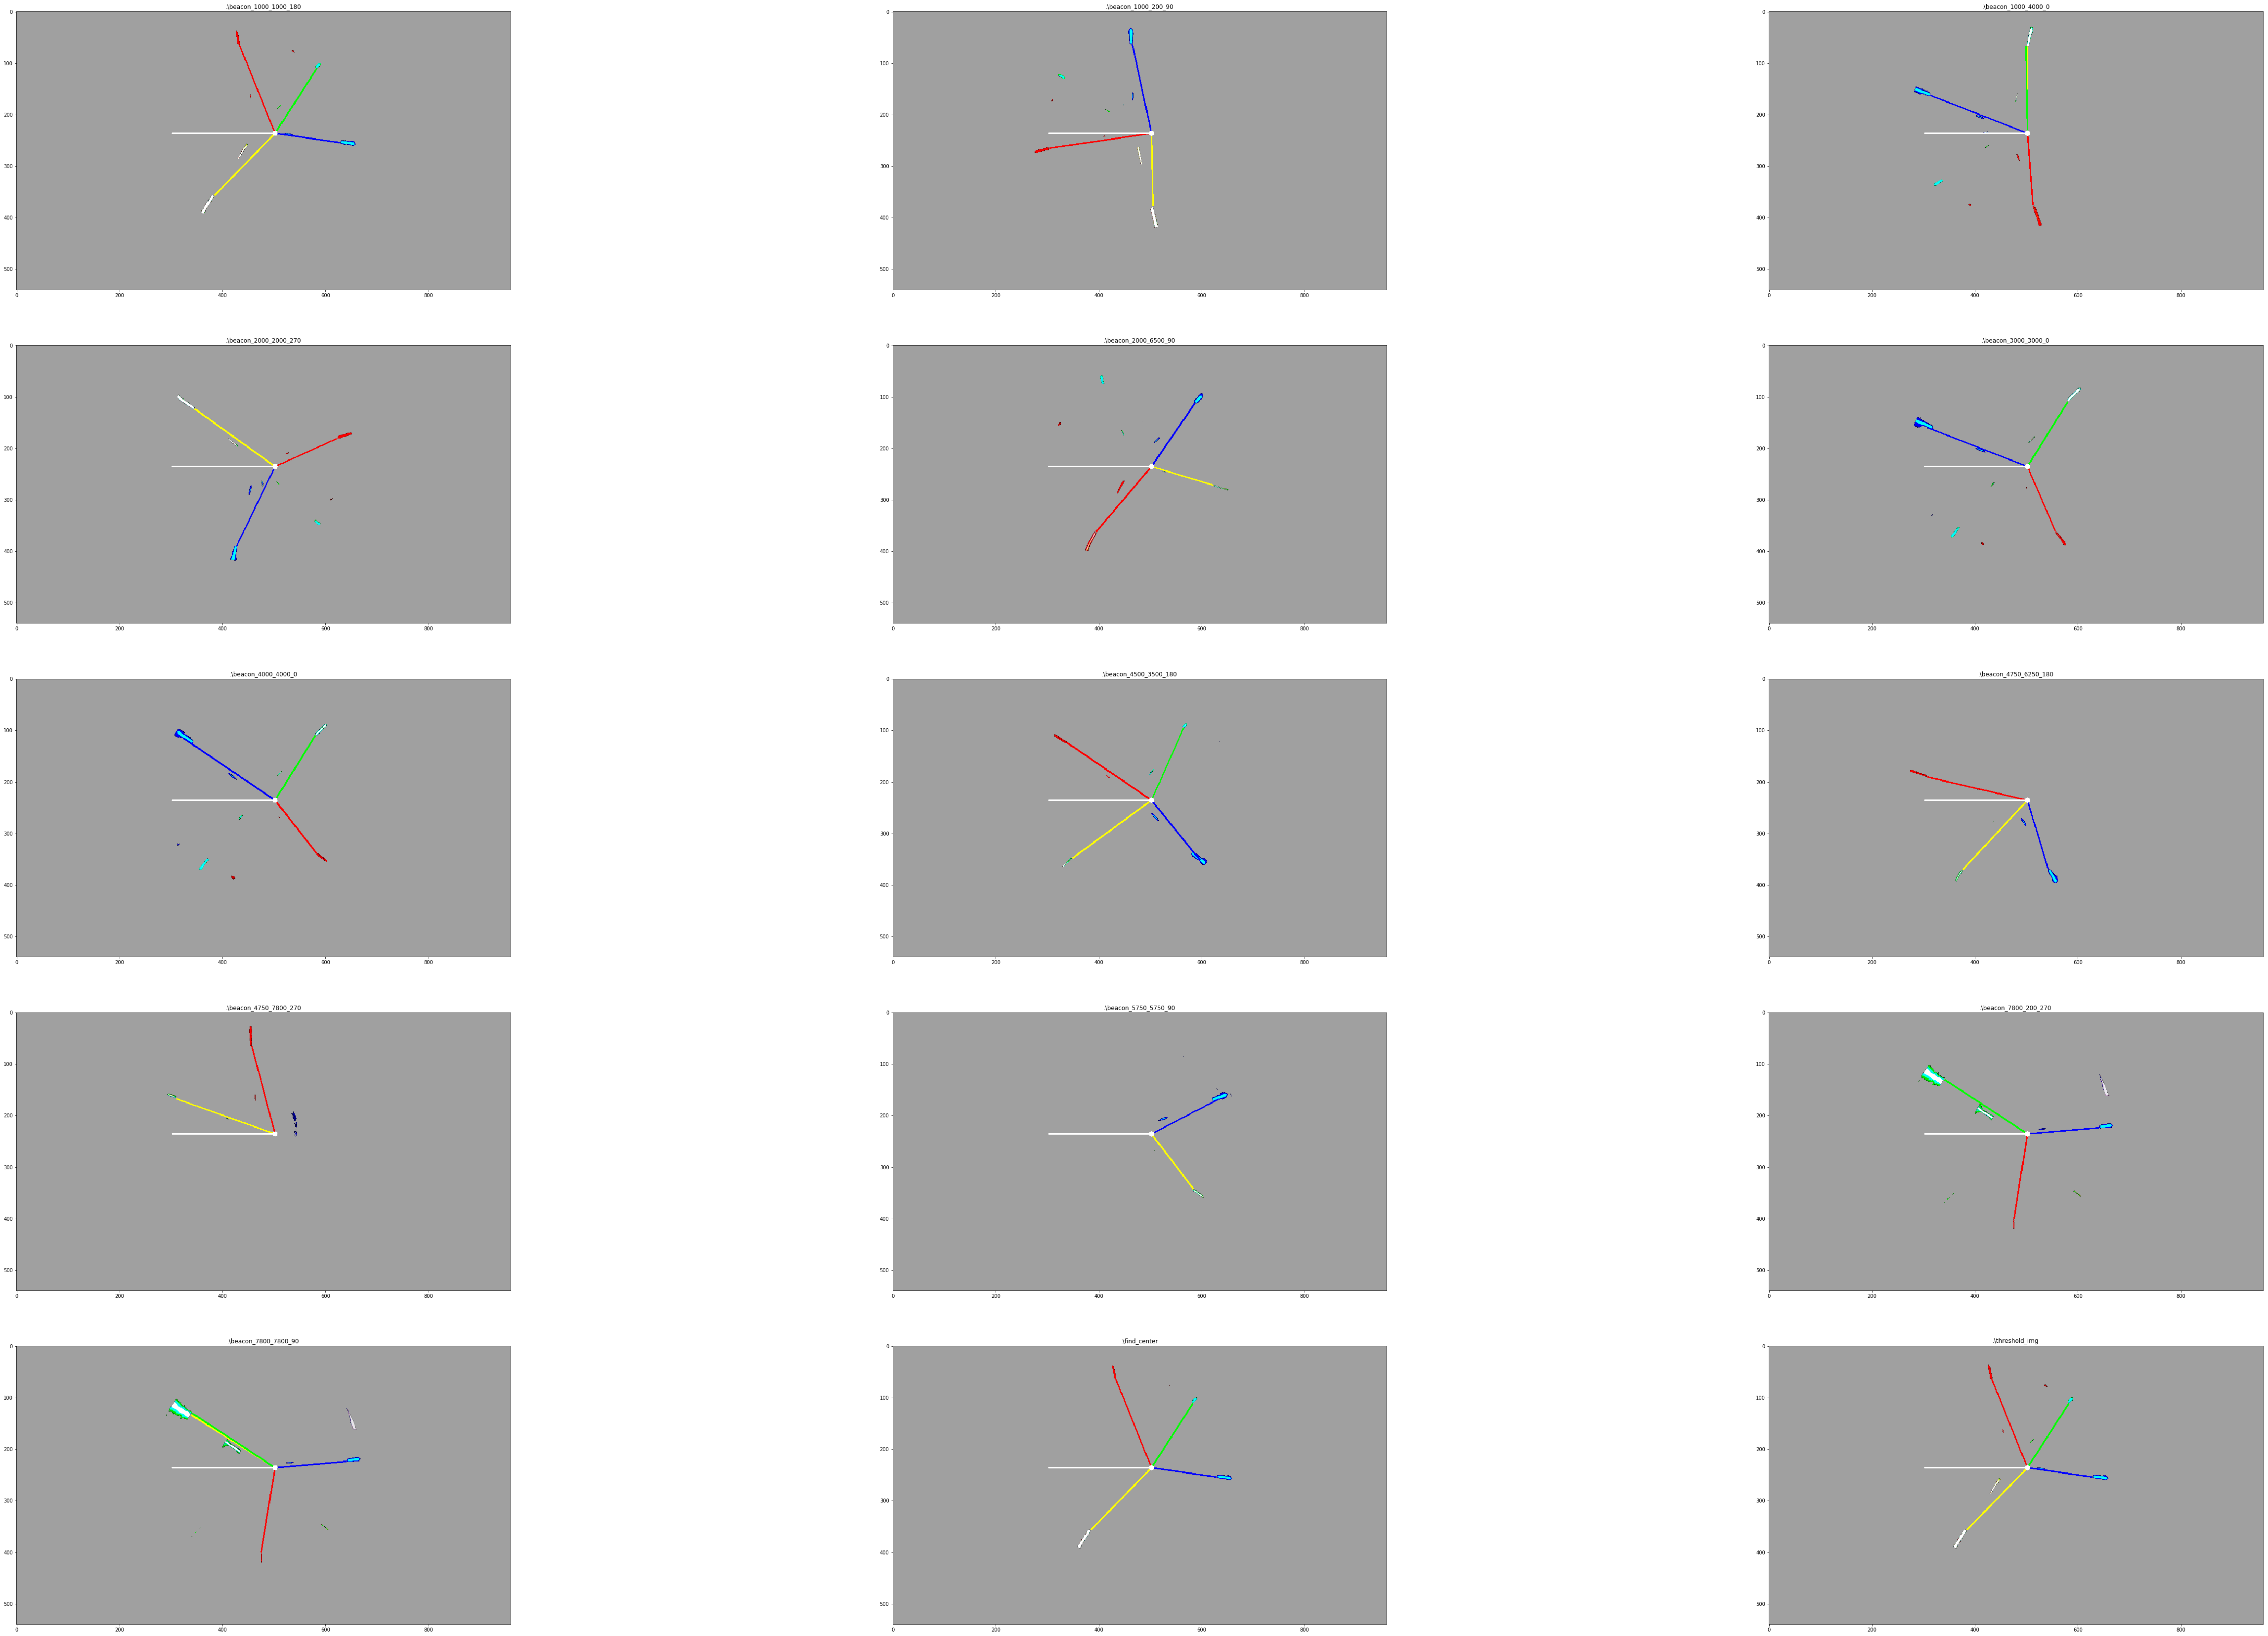

In [11]:

center_circles = (940, 632)
center_beacon = (502, 236)
i = 1
images = []
titles = []
for filename in glob.glob("./*.png"):
    print(i)
    i=i+1
    rawImage = cv2.imread(filename)    
    height,width,depth = rawImage.shape
    imgWithCircle  = np.zeros((height,width), np.uint8)
    cv2.circle(imgWithCircle,center_circles,400,(255,255,255),thickness=-1)
    cv2.circle(imgWithCircle,center_circles,80,(0,0,0),thickness=-1)
    imask = imgWithCircle>0
    img1 = np.zeros_like(rawImage, np.uint8)
    img1[imask] = rawImage[imask]

    imgWithCircle  = np.ones((height,width), np.uint8)
    cv2.circle(imgWithCircle,center_circles,320,(0,0,0),thickness=-1)
    cv2.circle(imgWithCircle,center_circles,150,(255,255,255),thickness=-1)
    imask = imgWithCircle>0
    img = np.zeros_like(img1, np.uint8)
    img[imask] = img1[imask]

    ret,thresh_img = cv2.threshold(img,220,0,cv2.THRESH_TOZERO)
    
    thresh_img,_ = find_angles_and_get_result(thresh_img,center_beacon)
    thresh_img[np.where((thresh_img==[0,0,0]).all(axis=2))] = [160,160,160]
    images.append(thresh_img)
    titles.append(filename[:-4])
    
show_images(images, cols = 5, titles = titles)

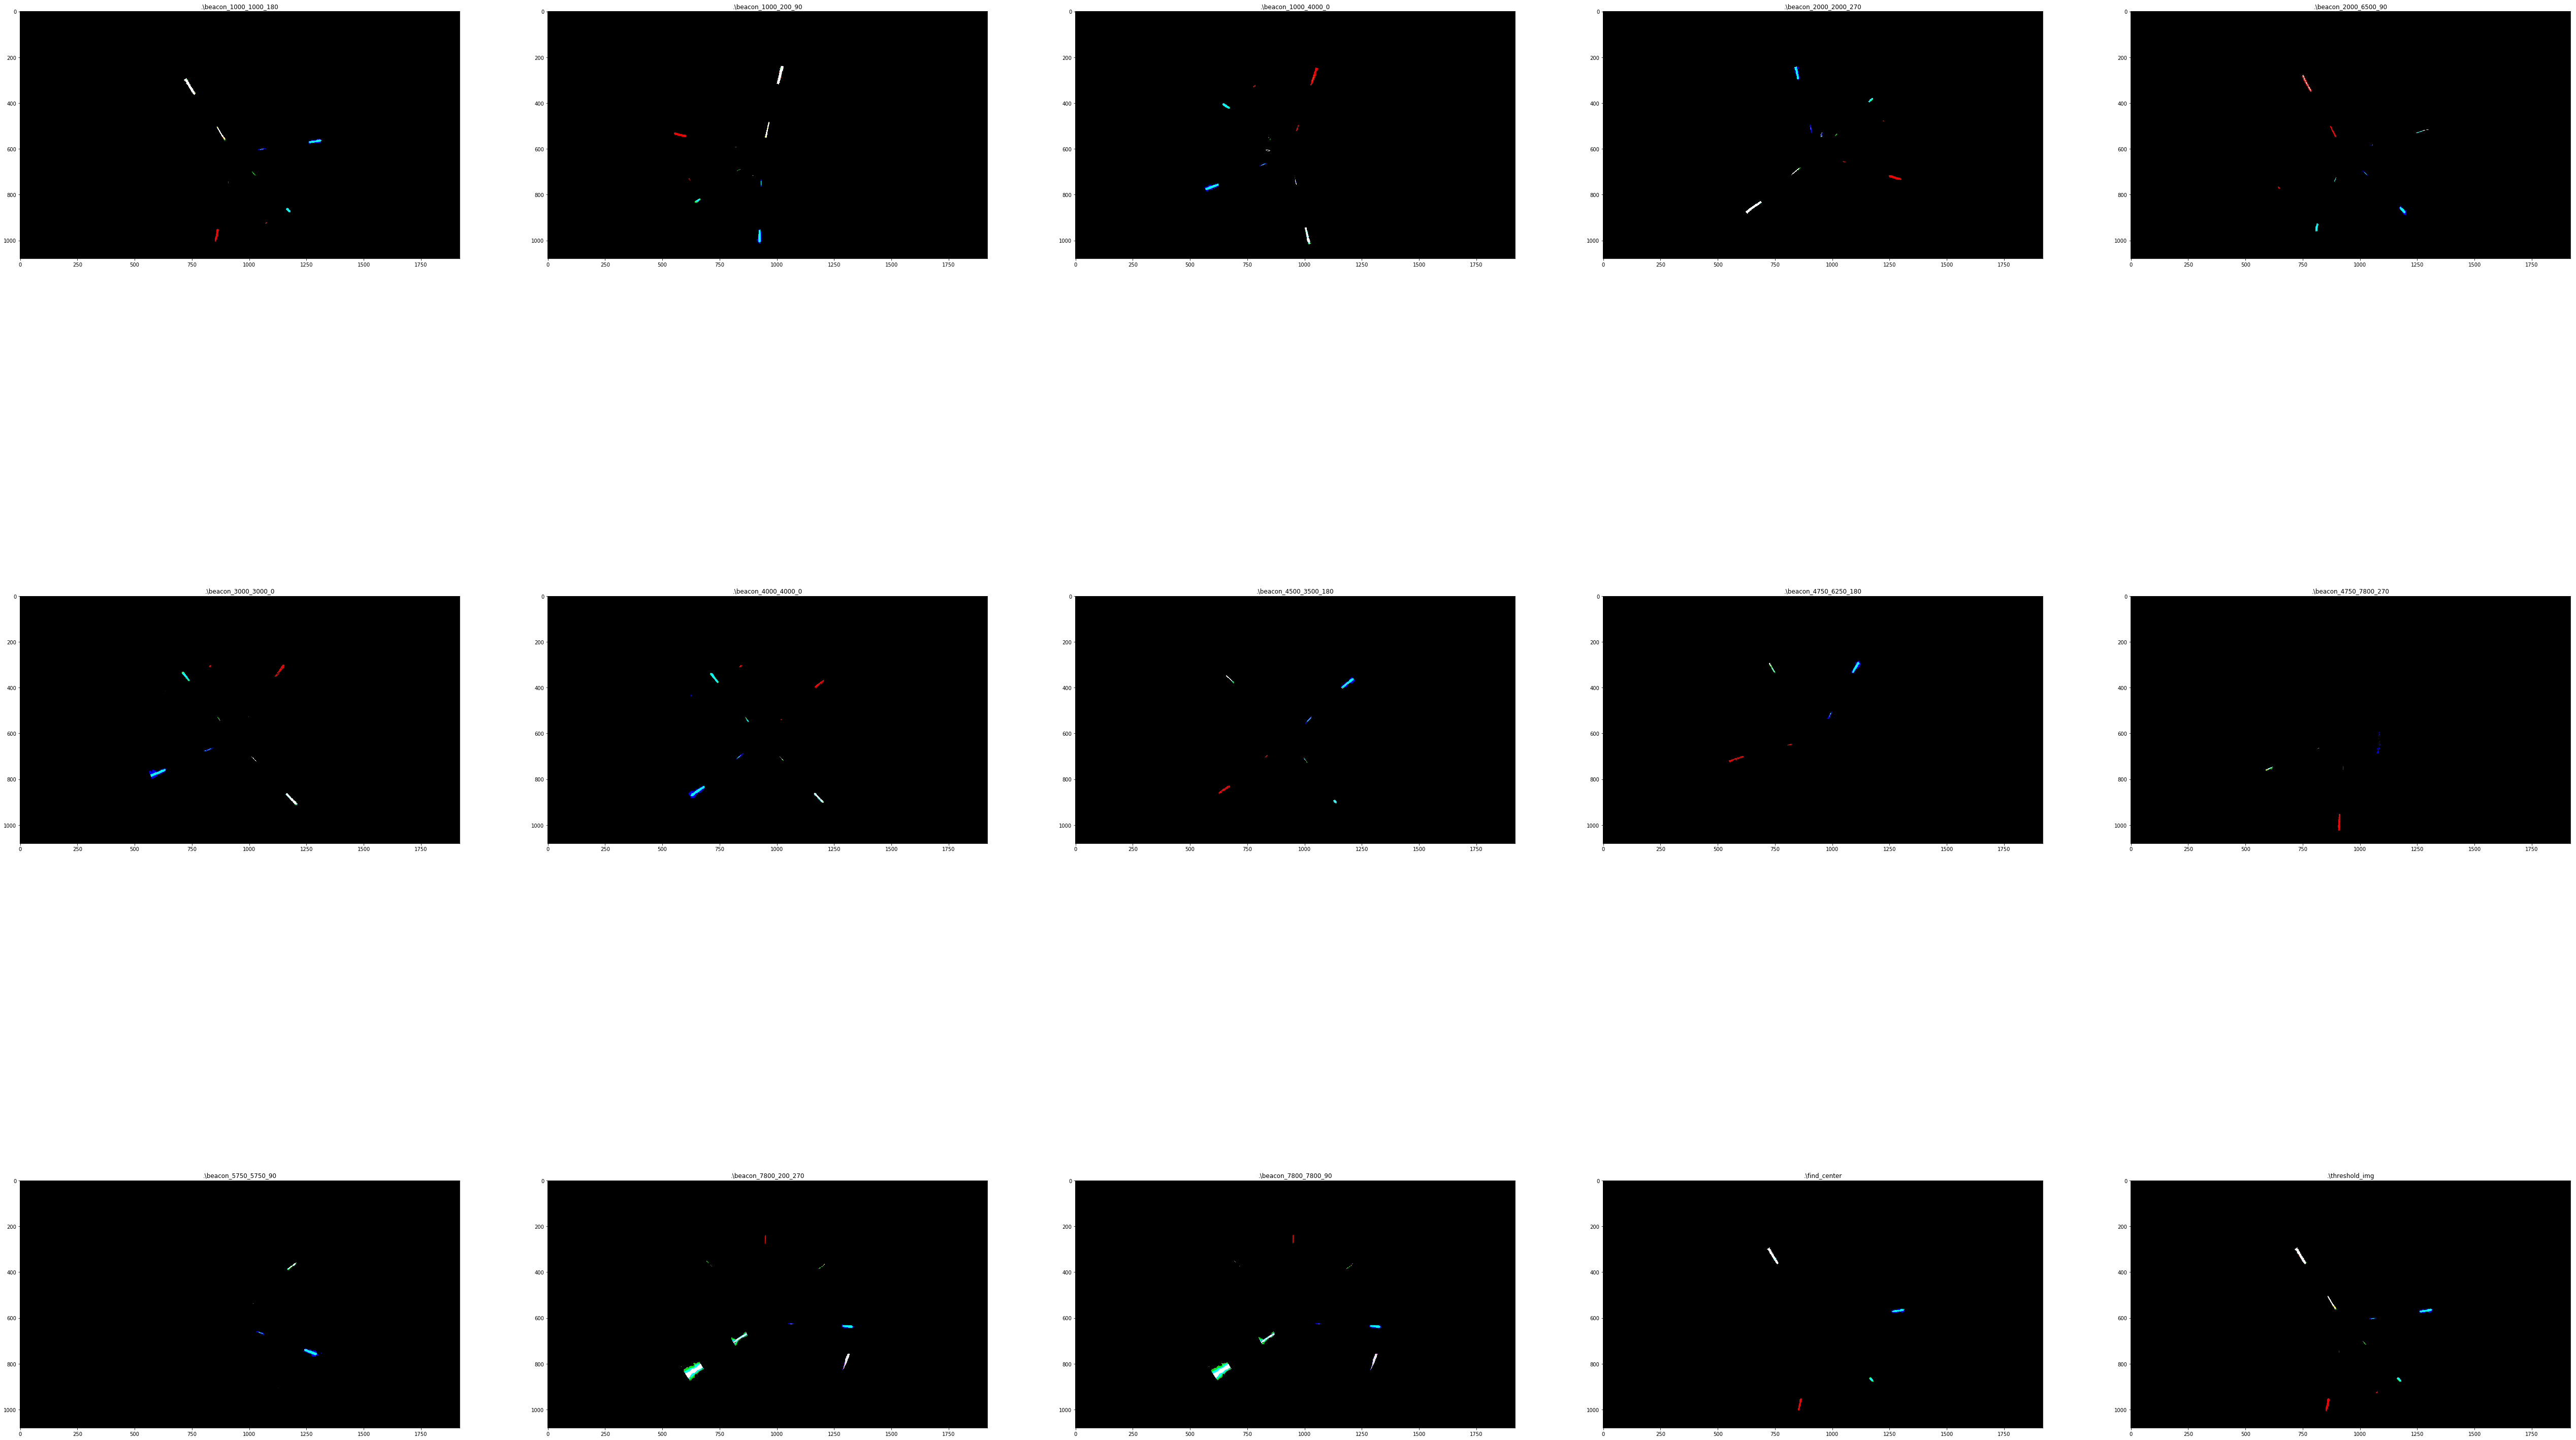

In [9]:
center = (940, 632)
i = 1
images = []
titles = []
for filename in glob.glob("./*.png"):
    rawImage = cv2.imread(filename)    
    height,width,depth = rawImage.shape
    imgWithCircle  = np.zeros((height,width), np.uint8)
    cv2.circle(imgWithCircle,center,400,(255,255,255),thickness=-1)
    cv2.circle(imgWithCircle,center,80,(0,0,0),thickness=-1)
    imask = imgWithCircle>0
    img1 = np.zeros_like(rawImage, np.uint8)
    img1[imask] = rawImage[imask]

    imgWithCircle  = np.ones((height,width), np.uint8)
    cv2.circle(imgWithCircle,center,320,(0,0,0),thickness=-1)
    cv2.circle(imgWithCircle,center,150,(255,255,255),thickness=-1)
    imask = imgWithCircle>0
    img = np.zeros_like(img1, np.uint8)
    img[imask] = img1[imask]

    ret,thresh_img = cv2.threshold(img,220,0,cv2.THRESH_TOZERO)
    thresh_img = cv2.cvtColor(thresh_img, cv2.COLOR_BGR2RGB)
    images.append(thresh_img)
    titles.append(filename[:-4])
show_images(images, cols = 3, titles = titles)